In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [3]:
import pandas as pd
import numpy as np

In [4]:
training_df = pd.read_csv('train/training.csv')
training_df = training_df[training_df['last'] != 0]

In [5]:
train_x = training_df.drop('last', axis=1)
train_x.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
train_y = training_df['last']

In [7]:
train_y = train_y.to_numpy()

In [25]:
np.shape(train_y)

(467,)

In [8]:
train_x = train_x.to_numpy()

In [9]:
test_df = pd.read_csv('test/testing.csv')
test_df = test_df[test_df['last'] != 0]

In [10]:
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
test_y = test_df['last'].to_numpy()

In [33]:
# create a discretized state vector for each 25 cent increment
# array positions (>=.75, .5-.75,.25-.5,0-.25, -.25-0, -.5--.25, -.75 - -.5, <= -.75)
def convert_to_vec(listy):
    ret_list = np.ndarray((len(listy), 8))
    for i, y in enumerate(listy):
        if y > 0:
            if y <= 0.25:
                ret_list[i] = np.array([0,0,0,1,0,0,0,0])
            elif y <= 0.5:
                ret_list[i] = np.array([0,0,1,0,0,0,0,0])
            elif y < 0.75:
                ret_list[i] = np.array([0,1,0,0,0,0,0,0])
            else:
                ret_list[i] = np.array([1,0,0,0,0,0,0,0])
        else:
            if y >= -0.25:
                ret_list[i] = np.array([0,0,0,0,1,0,0,0])
            elif y >= -0.5:
                ret_list[i] = np.array([0,0,0,0,0,1,0,0])
            elif y > -0.75:
                ret_list[i] = np.array([0,0,0,0,0,0,1,0])
            else:
                ret_list[i] = np.array([0,0,0,0,0,0,0,1])
    return ret_list

In [34]:
test_y = convert_to_vec(test_y)
train_y = convert_to_vec(train_y)

In [35]:
test_x = test_df.drop(columns=['last']).to_numpy()

We now have cleaned NP arrays for our training and testing inputs and outputs, so we begin constructing a Keras model.

In [55]:
model = keras.Sequential()
model.add(keras.Input(shape=(20,)))
model.add(layers.Dense(12, name="hidden1", activation='relu')) 
model.add(layers.Dense(12, name='hidden2', activation='relu'))
model.add(layers.Dense(8, name="output", activation='softmax'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 12)                252       
                                                                 
 hidden2 (Dense)             (None, 12)                156       
                                                                 
 output (Dense)              (None, 8)                 104       
                                                                 
Total params: 512
Trainable params: 512
Non-trainable params: 0
_________________________________________________________________


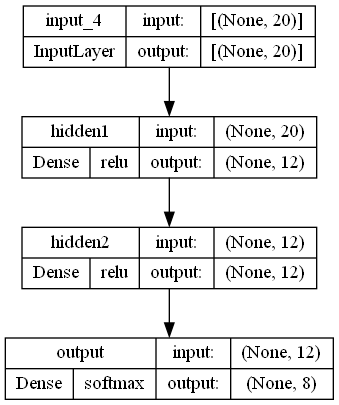

In [58]:
keras.utils.plot_model(
    model,
    to_file="model2.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [37]:
# reserve ~10% for inter-epoch validation
val_x = train_x[-50:]
val_y = train_y[-50:]
train_x = train_x[:-50]
train_y = train_y[:-50]


In [56]:
model.compile(
    optimizer=keras.optimizers.SGD(), # stoch grad descent
    loss=keras.losses.MeanSquaredError(), # MSE loss function to minimize
    metrics=[keras.metrics.Accuracy()],
)

In [57]:
session = model.fit(
    train_x,
    train_y,
    batch_size=25,
    epochs=100, 
    validation_data=(val_x, val_y),
)

Epoch 1/100
17/17 [==============================] - 1s 9ms/step - loss: 0.1115 - accuracy: 0.0000e+00 - val_loss: 0.1114 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.0000e+00 - val_loss: 0.1113 - val_accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.0000e+00 - val_loss: 0.1112 - val_accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1113 - accuracy: 0.0000e+00 - val_loss: 0.1111 - val_accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1112 - accuracy: 0.0000e+00 - val_loss: 0.1111 - val_accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1111 - accuracy: 0.0000e+00 - val_loss: 0.1110 - val_accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1111 - accuracy: 0.0000e+00 - v

In [46]:
session.history

{'loss': [0.11075419187545776,
  0.11068885028362274,
  0.11062321811914444,
  0.11055806279182434,
  0.11049234867095947,
  0.11042656004428864,
  0.11036078631877899,
  0.11029519885778427,
  0.11022946238517761,
  0.11016343533992767,
  0.11009759455919266,
  0.11003189533948898,
  0.10996607691049576,
  0.10990050435066223,
  0.10983487963676453,
  0.10976909101009369,
  0.10970330238342285,
  0.10963735729455948,
  0.10957162827253342,
  0.10950559377670288,
  0.1094399020075798,
  0.1093740239739418,
  0.10930798947811127,
  0.10924192517995834,
  0.10917571187019348,
  0.10910982638597488,
  0.10904323309659958,
  0.10897686332464218,
  0.10891064256429672,
  0.10884419083595276,
  0.10877762734889984,
  0.1087111085653305,
  0.10864494740962982,
  0.1085783988237381,
  0.10851187258958817,
  0.1084451749920845,
  0.10837839543819427,
  0.10831192880868912,
  0.1082456037402153,
  0.10817880183458328,
  0.10811228305101395,
  0.10804573446512222,
  0.10797885805368423,
  0.10791

In [47]:
results = model.evaluate(test_x, test_y, batch_size=100)
print("test loss, test acc:", results)

3/3 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.0000e+00
test loss, test acc: [0.10295502096414566, 0.0]


In [48]:
predictions = model.predict(test_x)

9/9 [==============================] - 0s 1ms/step


In [51]:
direction_success = 0
for i, pred in enumerate(predictions):
    pred_index = np.argmax(pred)
    test_index = np.argmax(test_y[i])
    if pred_index <= 3  and test_index <= 3:
        direction_success += 1
    elif pred_index > 3 and test_index > 3:
        direction_success += 1


In [52]:
# compute accuracy of the direction of travel
direction_success / len(test_y)

0.5149253731343284

In [53]:
# compute accuracy within one tick (0.25)
tick_success = 0
for i, pred in enumerate(predictions):
    pred_index = np.argmax(pred)
    test_index = np.argmax(test_y[i])
    if pred_index == test_index:
        tick_success += 1

In [54]:
tick_success / len(test_y)

0.48134328358208955